In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import openpyxl 

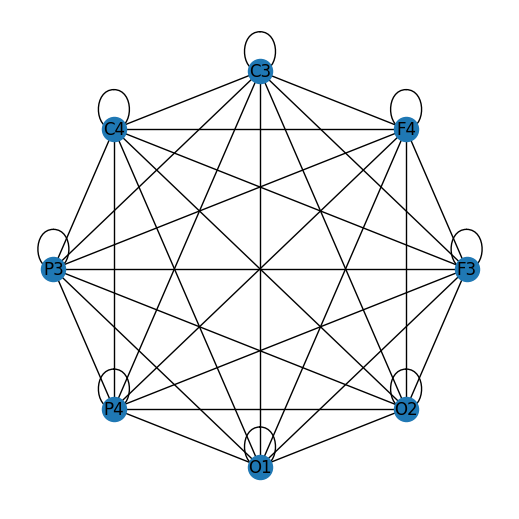

In [3]:
## los archivos que se van a usar
excel_conectividad = r"C:\Users\HP\Documents\GitHub\Neurociencias-2026-1\S03_datasets\EEG.xlsx"
excel_coordenadas = r"C:\Users\HP\Documents\GitHub\Neurociencias-2026-1\S03_datasets\EEG_3D_coordinates.xlsx"

## leer los archivos como diccionario el sheet name es para que lea todas las hojas del excel
conectividad_dict = pd.read_excel(excel_conectividad, sheet_name=None)
coordenadas_dict = pd.read_excel(excel_coordenadas, sheet_name=None)

## especifica que hoja vamos a leer [0]
motor_df= conectividad_dict[list(conectividad_dict.keys())[0]]
coordenadas_df= coordenadas_                                                                  rffdxdict[list(coordenadas_dict.keys())[0]]


### redefine el aindice para que sea mas facil convertirlo a grafo
## inplace reemplaza el dataframe original
motor_df.set_index("Unnamed: 0", inplace=True, drop=True)
coordenadas_df.set_index("Canal", inplace=True, drop=True)

## dibujar el grafo
plt.figure(figsize=(5,5))
G = nx.from_pandas_adjacency(motor_df)
nx.draw_circular(G, with_labels=True)
plt.show()

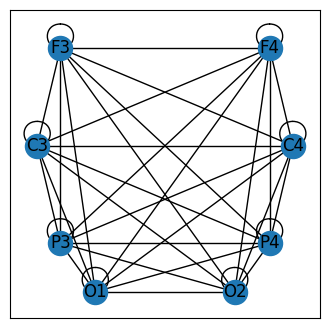

In [4]:
# PLOTEO 2D
### crear un dicconario de posiciones
pos2D= {canal: (coordenadas_df.loc[canal, 'x'],
                coordenadas_df.loc[canal, 'y']) for canal in coordenadas_df.index}

plt.figure(figsize=(4,4))
nx.draw_networkx(G, pos=pos2D)
plt.show()

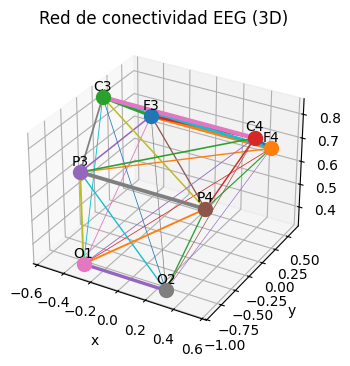

In [14]:
pos3D= {canal: (coordenadas_df.loc[canal, 'x'],
                coordenadas_df.loc[canal, 'y'],
                coordenadas_df.loc[canal, 'z']) for canal in coordenadas_df.index}

fig = plt.figure(figsize=(4,4))
## definir el tamaño
ax = fig.add_subplot(111, projection='3d')
## contar los subplots que voy a tener y que de esos vaya uno por uno (111)

## dibujar nodos en 3d
for canal, (x, y, z) in pos3D.items():
    ax.scatter(x, y, z, s=100)
    ax.text(x, y, z+0.03, canal, fontsize=10, ha='center')

for i, j, data in G.edges(data=True):
    x= [pos3D[i][0], pos3D[j][0]]
    y= [pos3D[i][1], pos3D[j][1]]
    z= [pos3D[i][2], pos3D[j][2]]
    ax.plot(x, y, z, linewidth=data['weight']*5)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Red de conectividad EEG (3D)')
plt.show()

In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [8]:
## crear mapa de calor 
import seaborn as sns
## este paquete hace que sean mas bonitos los grafos

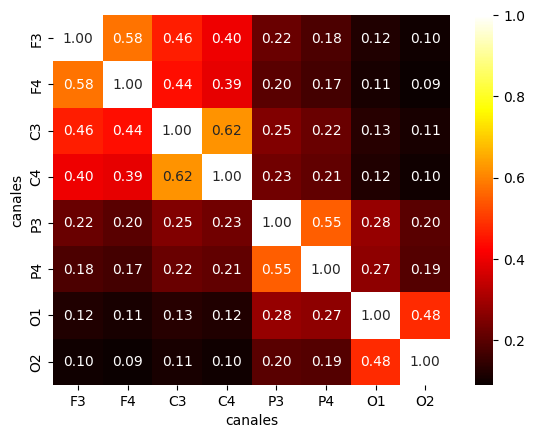

In [12]:
ax = sns.heatmap(motor_df, 
                 annot=True, cmap='hot', fmt='.2f',
                 xticklabels=motor_df.columns, yticklabels=motor_df.columns)
ax.set(xlabel='canales', ylabel='canales')
plt.show()

## fmt es formato hace que los decimales solo sean dos 

In [ ]:
### que tendriamos que modificar en el scritp para que la diagonal sea 0